In [1]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.kakaobank.channel',
    lang = 'ko',
    country = 'kr',
    sort = Sort.NEWEST,
    count = 100,
    filter_score_with = None
)

In [2]:
import pandas as pd
import numpy as np
import json
import time
from tqdm import tqdm
from app_store_scraper import AppStore

In [3]:
def Extract_reviews(app_name:str, app_id:int): 
    ott = AppStore(country='kr', app_name=app_name, app_id=app_id)
    ott.review()

    ott_reviews = pd.DataFrame(ott.reviews).sort_values('date', ascending=False).reset_index(drop=True)
    ott_reviews['ott'] = app_name
    return ott_reviews

In [6]:
ott_platform = {'kyobo': 464243977}

app_store_reviews = pd.DataFrame()
for i in tqdm(ott_platform):
  ott_reviews = Extract_reviews(i, ott_platform[i])
  app_store_reviews= pd.concat([app_store_reviews, ott_reviews], axis=0)

print('Done..')

  0%|          | 0/1 [00:00<?, ?it/s]2023-12-06 16:22:52,252 [INFO] Base - Initialised: AppStore('kr', 'kyobo', 464243977)
2023-12-06 16:22:52,252 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/kyobo/id464243977
2023-12-06 16:22:57,866 [INFO] Base - [id:464243977] Fetched 200 reviews (200 fetched in total)
2023-12-06 16:23:03,402 [INFO] Base - [id:464243977] Fetched 460 reviews (460 fetched in total)
2023-12-06 16:23:09,294 [INFO] Base - [id:464243977] Fetched 640 reviews (640 fetched in total)
2023-12-06 16:23:15,112 [INFO] Base - [id:464243977] Fetched 860 reviews (860 fetched in total)
2023-12-06 16:23:21,108 [INFO] Base - [id:464243977] Fetched 1100 reviews (1100 fetched in total)
2023-12-06 16:23:26,594 [INFO] Base - [id:464243977] Fetched 1220 reviews (1220 fetched in total)
2023-12-06 16:23:32,423 [INFO] Base - [id:464243977] Fetched 1460 reviews (1460 fetched in total)
2023-12-06 16:23:37,943 [INFO] Base - [id:464243977] Fetched 1640 reviews (1640 fetc

Done..


In [7]:
app_store_reviews

,date,review,rating,isEdited,title,userName,developerResponse,ott
0,2023-12-03 11:26:16,좀 고쳐주세요… 지웠다 깔아도 안되네요 한 2주쯤된듯,4,False,리퀘스트 블록,롵떼,NaN,kyobo
1,2023-12-02 03:50:38,로그인유지 했는데 들어갈때마다 로그아웃되서 로그인 새로 해야하네요,4,False,로그인유지,jongjin0624,NaN,kyobo
2,2023-12-01 01:33:48,항상 풀린다 그래서 매번 로그인하는데 그마저도 튕길 때가 있다,3,False,로그인 유지가 안된다,유순한 호랑이,NaN,kyobo
3,2023-11-29 19:50:24,왜 회원가입할때 평소에 쓰지 않는 긴 아이디와 이메일을 강제로 적어두고 수정도 불가...,1,False,왜 내 아이디를 멋대로 정함?,첫날부터 버그냐...?,NaN,kyobo
4,2023-11-29 01:57:00,돈도 많이 버실텐데 퍼포먼스 개선 좀 하세요. 웹뷰로 퉁친거 감안해도 반응성이나 리...,1,False,피시 브라우저나 모바일 앱이나 갑갑해서 속터짐.,트래쿨,NaN,kyobo
...,...,...,...,...,...,...,...,...
1995,2011-12-12 06:40:20,교보문고 어플이 드디어 나왔네요!! \no(^▽^)o 매일 모바일버젼으로 힘들게 주...,5,False,기다리고 기다리던..,동글탱,NaN,kyobo
1996,2011-12-11 12:48:57,앱 로딩속도도 빠르고 인터페이스도 깔끔하고 버전1.0인걸 감안하면 좋은 수준이네요....,3,False,드디어 나왔군요!,나디아,NaN,kyobo
1997,2011-12-09 15:53:37,"앱디자인도 깔끔하고 기능도 좋네요. 영업점 도서 위치검색과 온라인 구매, 바로드림 ...",5,False,깔끔하고 다양한기능,Crucity,NaN,kyobo
1998,2011-12-07 13:51:05,표지검색 정확하게 잘되네요! 서점에서 책보고 아이폰으로 바로드림 주문해서 싸게 사고...,5,False,드디어 나왔네요!!,Christina YJ,NaN,kyobo


In [9]:
import jpype
from konlpy.tag import Okt
okt = Okt()

comment_nouns = []
for cmt in app_store_reviews['review']:
    comment_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
comment_nouns2 = []
word = [w for w in comment_nouns if len(w) > 1]  
comment_nouns2.extend(word)

In [10]:
from collections import Counter
word_count = Counter(comment_nouns2)

word_count

Counter({'로그인': 822,
         '유지': 33,
         '로그아웃': 166,
         '항상': 45,
         '매번': 89,
         '튕길': 1,
         '회원': 44,
         '가입': 37,
         '평소': 14,
         '아이디': 78,
         '이메일': 7,
         '강제': 15,
         '수정': 40,
         '불가능': 2,
         '나중': 7,
         '내용': 19,
         '글자': 14,
         '고객': 60,
         '자기': 5,
         '생각': 86,
         '대로': 3,
         '마인드': 3,
         '인걸': 2,
         '버실텐데': 1,
         '퍼포먼스': 1,
         '개선': 187,
         '웹뷰': 2,
         '감안': 3,
         '반응': 26,
         '퀘스트': 1,
         '처리': 10,
         '속도': 50,
         '주문': 145,
         '무슨': 34,
         '그것': 14,
         '점심시간': 2,
         '실행': 68,
         '계정': 6,
         '비번': 30,
         '버스': 5,
         '자주': 110,
         '사용': 276,
         '북중': 1,
         '여기': 24,
         '제일': 19,
         '아이패드': 32,
         '주로': 17,
         '보드': 5,
         '랩탑': 1,
         '가로': 15,
         '보기': 42,
         '지원': 13,
         

In [11]:
max = 50
top_20 = {}
for word, counts in word_count.most_common(max):
    top_20[word] = counts
    print(f'{word} : {counts}')

로그인 : 822
교보 : 626
어플 : 492
문고 : 400
사용 : 276
구매 : 258
이용 : 257
바로 : 245
업데이트 : 238
계속 : 237
결제 : 230
화면 : 206
자동 : 204
다시 : 202
검색 : 199
모바일 : 196
개선 : 187
로그아웃 : 166
오류 : 163
드림 : 158
다른 : 157
리뷰 : 154
진짜 : 151
주문 : 145
서점 : 142
정말 : 140
자주 : 110
그냥 : 109
기능 : 108
문제 : 104
페이지 : 100
서비스 : 99
배송 : 96
접속 : 94
할인 : 92
처음 : 91
네이버 : 91
자꾸 : 91
장바구니 : 91
도서 : 90
하나 : 90
매번 : 89
로딩 : 87
생각 : 86
이벤트 : 85
해도 : 84
버튼 : 83
시간 : 83
확인 : 82
체크 : 80


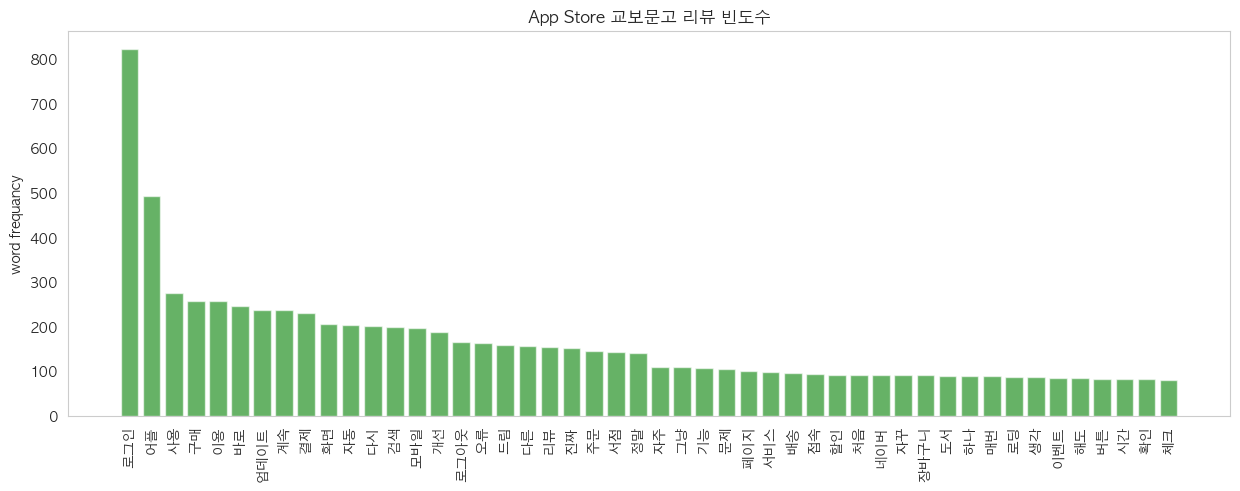

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 5))
plt.title('App Store 교보문고 리뷰 빈도수', fontsize = 12)    
plt.ylabel('word frequancy')    
plt.xticks(rotation = 90)
for key, value in top_20.items():
    if key == '교보' or key == '문고' : pass
    else : plt.bar(key, value, color='green', alpha = 0.6) 
plt.grid(False)
plt.show()

In [29]:
from wordcloud import WordCloud
from PIL import Image

In [35]:
word_count['교보'] = 0
word_count['문고'] = 0

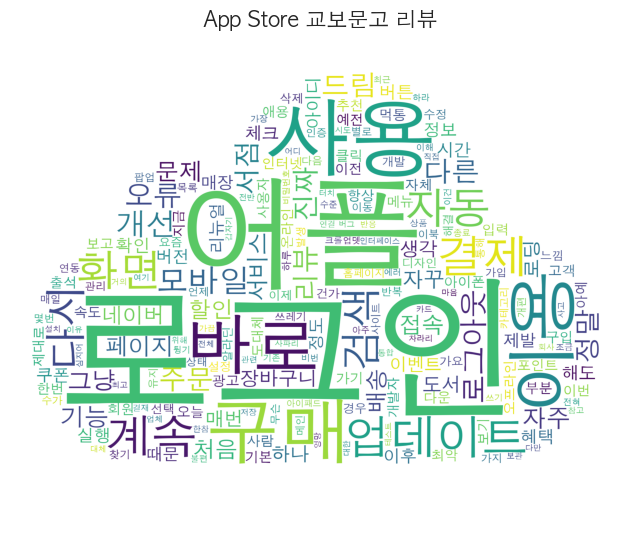

In [36]:
import numpy as np

im = Image.open('../../Data/cloud.png') 
mask_arr = np.array(im) 

wc = WordCloud(font_path = 'AppleGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("App Store 교보문고 리뷰", fontsize = 15)
plt.axis('off')
plt.show()